### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import keras

import warnings
warnings.filterwarnings('ignore')

from keras.models import Sequential
from keras.optimizers import SGD
from keras import regularizers
from keras import optimizers

import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Reshape, Dense, Flatten, Dropout,MaxPooling2D, BatchNormalization

C:\Users\rames\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
import tensorflow as tf
tf.set_random_seed(42)

#### Change train and test labels into one-hot vectors

In [4]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
print("x_train shape:", x_train.shape, "\ny_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "\ny_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) 
y_train shape: (60000,)
x_test shape: (10000, 28, 28) 
y_test shape: (10000,)


In [6]:
print("Dimension of train images",x_train.shape[1:3])
print("Dimension of test images",x_test.shape[1:3])

Dimension of train images (28, 28)
Dimension of test images (28, 28)


In [7]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [8]:
print(y_train.shape)
print('First 5 examples now are: ', y_train[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


#### Build the Graph

#### Initialize model, reshape & normalize data

In [9]:
x_train = x_train / 255.0
x_test = x_test / 255.0
print("x_trai size: ",x_train.shape)
print("First 5 samples ",x_train[0:5])

x_trai size:  (60000, 28, 28)
First 5 samples  [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [10]:
model = Sequential()
model.add(Reshape((784,),input_shape=(28,28,)))
model.add(Dense(units=100,activation="relu"))
model.add(Dense(units=10,activation="softmax"))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model_history = model.fit(x_train, y_train, 
          validation_data=(x_test, y_test), 
          epochs=5,
          batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 42us/step - loss: 1.0368 - acc: 0.6887 - val_loss: 0.7426 - val_acc: 0.7555
Epoch 2/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.6597 - acc: 0.7844 - val_loss: 0.6298 - val_acc: 0.7886
Epoch 3/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.5817 - acc: 0.8081 - val_loss: 0.5860 - val_acc: 0.7972
Epoch 4/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.5404 - acc: 0.8201 - val_loss: 0.5481 - val_acc: 0.8118
Epoch 5/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.5134 - acc: 0.8273 - val_loss: 0.5287 - val_acc: 0.8169


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [13]:
accuracy = model.evaluate(x=x_test,y=y_test,batch_size=10)
print("Accuracy: ", accuracy[1])

10000/10000 [==============================] - 1s 96us/step
Accuracy:  0.8168999962508678


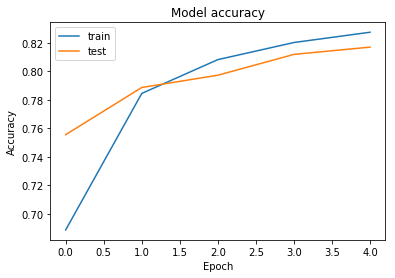

In [14]:
# Model Accuracy 
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

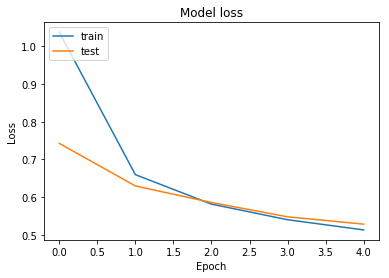

In [15]:

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [16]:
model = Sequential()

model.add(Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(BatchNormalization())


#Hidden layers
model.add(Dense(200, activation='relu', name='Layer_1'))
model.add(Dense(100, activation='relu', name='Layer_2'))

#Dropout layer
model.add(Dropout(0.5))

#Hidden layers
model.add(Dense(60, activation='relu', name='Layer_3'))
model.add(Dense(30, activation='relu', name='Layer_4'))

#Dropout layer
model.add(Dropout(0.25))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [17]:
#Output layer
model.add(keras.layers.Dense(10, activation='softmax', name='Output'))

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
#Train the model
model.fit(x_train,y_train,          
          validation_data=(x_test,y_test),
          epochs=20,
          batch_size=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 196us/step - loss: 0.7145 - acc: 0.7533 - val_loss: 0.4653 - val_acc: 0.8328
Epoch 2/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.4948 - acc: 0.8322 - val_loss: 0.4046 - val_acc: 0.8543
Epoch 3/20
60000/60000 [==============================] - 11s 191us/step - loss: 0.4420 - acc: 0.8494 - val_loss: 0.3726 - val_acc: 0.8642
Epoch 4/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.4037 - acc: 0.8610 - val_loss: 0.3885 - val_acc: 0.8617
Epoch 5/20
60000/60000 [==============================] - 10s 172us/step - loss: 0.3797 - acc: 0.8680 - val_loss: 0.3771 - val_acc: 0.8681
Epoch 6/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.3587 - acc: 0.8745 - val_loss: 0.3568 - val_acc: 0.8720
Epoch 7/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.3488 - acc: 0.8784 - val_loss: 0.3

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
Layer_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
Layer_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
Layer_3 (Dense)              (None, 60)                6060      
_________________________________________________________________
Layer_4 (Dense)              (None, 30)                1830      
__________

In [21]:
accuracy = model.evaluate(x=x_test,y=y_test,batch_size=50)
print("Accuracy: ", accuracy[1])

10000/10000 [==============================] - 1s 66us/step
Accuracy:  0.8869999951124191


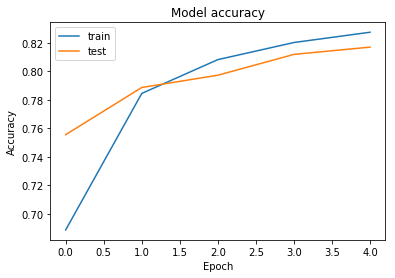

In [22]:
# Model Accuracy 
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

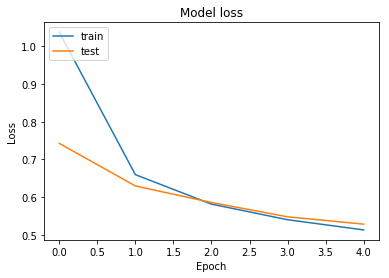

In [23]:

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
 ###with `softmax` output layer, `categorical_crossentropy` loss and `adam` optimizer got accuracy 88.7 compared to sgd accuracy is improved